In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
def func(x):
    if x == "yes":
        return 1
    else:
        return 0

In [24]:
df.mainroad = df.mainroad.apply(func)

In [25]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [26]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [27]:
df.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [28]:
df.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [29]:
df.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [33]:
df.guestroom = df.guestroom.apply(func)
df.basement = df.basement.apply(func)
df.hotwaterheating = df.hotwaterheating.apply(func)
df.airconditioning = df.airconditioning.apply(func)
df.prefarea = df.prefarea.apply(func)

In [31]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [34]:
def func(x):
    if x == "furnished":
        return 2
    elif x == "semi-furnished":
        return 1
    elif x == "unfurnished":
        return 0

In [37]:
df.furnishingstatus = df.furnishingstatus.apply(func)

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,0,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,0,3,0,2
2,12250000,9960,3,2,2,1,0,0,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,0,0,0,3,1,2
4,11410000,7420,4,1,2,1,0,0,0,0,2,0,2


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_df, test_df = train_test_split(df, train_size=0.7)

In [44]:
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
357,3773000,6930,4,1,2,0,0,0,0,0,1,0,2
260,4473000,3162,3,1,2,1,0,0,0,0,1,0,2
435,3290000,4040,2,1,1,1,0,0,0,0,0,0,0
418,3360000,3500,4,1,2,1,0,0,0,0,2,0,0
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0


In [45]:
x_train = train_df.drop(columns="price")
y_train = train_df.price

x_test = test_df.drop(columns="price")
y_test = test_df.price

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt = DecisionTreeRegressor(max_depth=5)

In [46]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [51]:
imp_df = pd.DataFrame({"Variable":x_train.columns, "Importance":dt.feature_importances_})
imp_df.sort_values(by="Importance", ascending=False)

,Variable,Importance
0,area,0.563429
2,bathrooms,0.194168
9,parking,0.070442
10,prefarea,0.064133
11,furnishingstatus,0.037243
3,stories,0.034345
4,mainroad,0.026985
1,bedrooms,0.009255
5,guestroom,0.000000
6,basement,0.000000


#### Convinience function for plotting the decision tree

In [52]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [53]:
def plot(dt_regressor):
    dot_data = StringIO()
    export_graphviz(dt_regressor, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

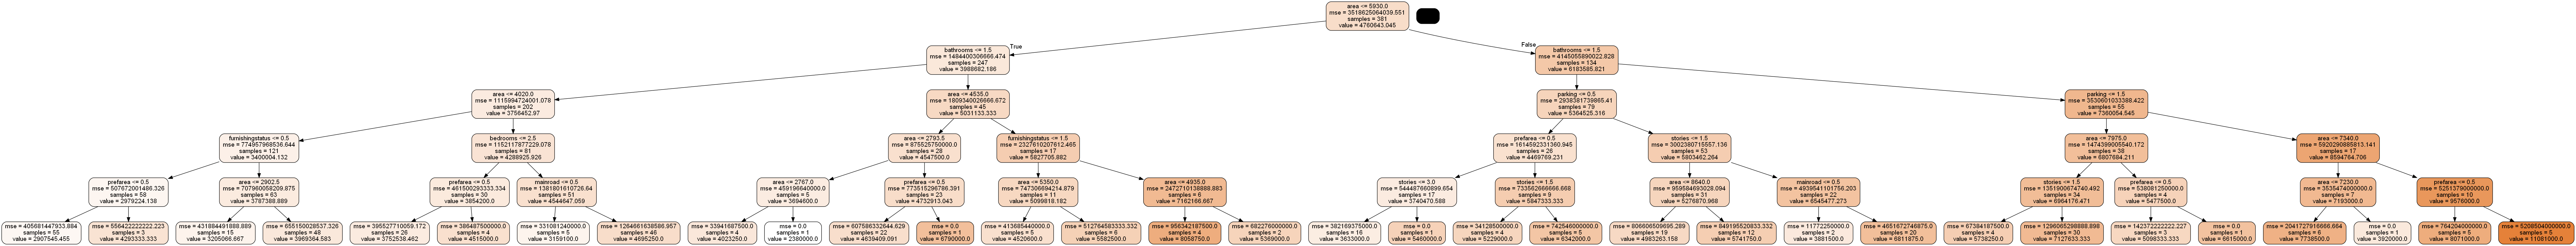

In [54]:
plot(dt)

#### Well, yes I should've did scaling for the target variable. Just look at the mse values in the nodes man... they look scary!!

#### Let's do it and train the model again

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
y_train = y_train.values.reshape((y_train.shape[0], 1))

In [71]:
y_train.shape

(381, 1)

In [72]:
y_test = y_test.values.reshape((y_test.shape[0], 1))

In [73]:
y_test.shape

(164, 1)

In [74]:
scaler = MinMaxScaler()

y_train = scaler.fit_transform(y_train)

y_test = scaler.transform(y_test)

In [77]:
dt = DecisionTreeRegressor(max_depth=3)

dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

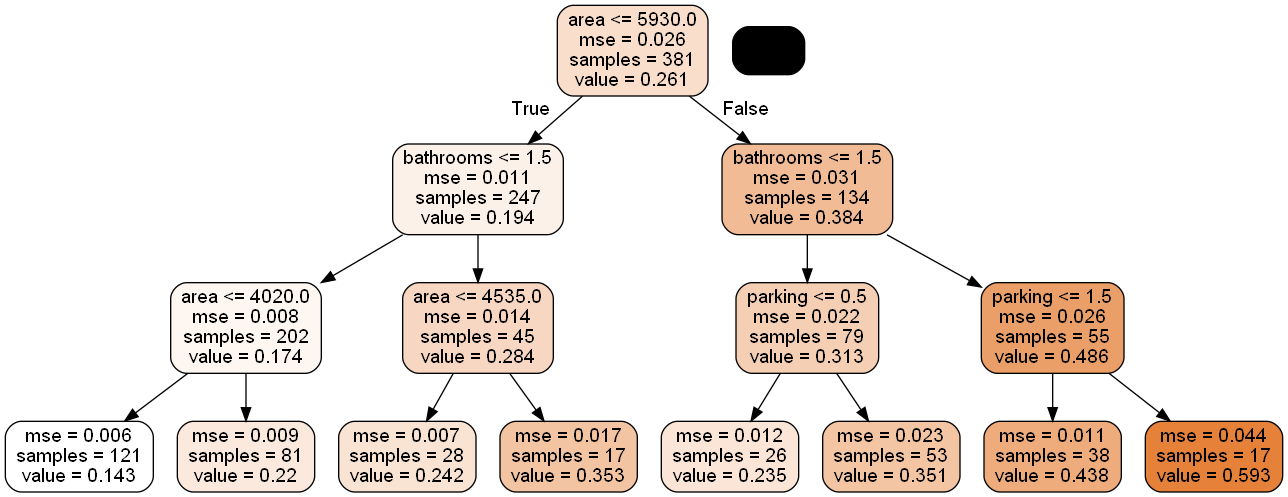

In [78]:
plot(dt)

Let's do some hyperparameter tuning using gridsearchcv

In [79]:
from sklearn.model_selection import GridSearchCV

In [91]:
params = {
    "max_depth":[5, 10, 20, 40, 100, 200],
    "min_samples_split":[10, 20, 50, 100, 200],
    "min_samples_leaf":[5, 10, 20, 40, 80, 160]
}

dt_basic = DecisionTreeRegressor()

gs = GridSearchCV(estimator=dt_basic,
                 param_grid=params,
                 scoring="neg_mean_squared_error",
                 n_jobs=-1,
                 cv=4,
                 verbose=1)

In [92]:
gs.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 40, 100, 200],
                         'min_samples_leaf': [5, 10, 20, 40, 80, 160],
                         'min_samples_split': [10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
dt_best = gs.best_estimator_

In [94]:
dt_best

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20)

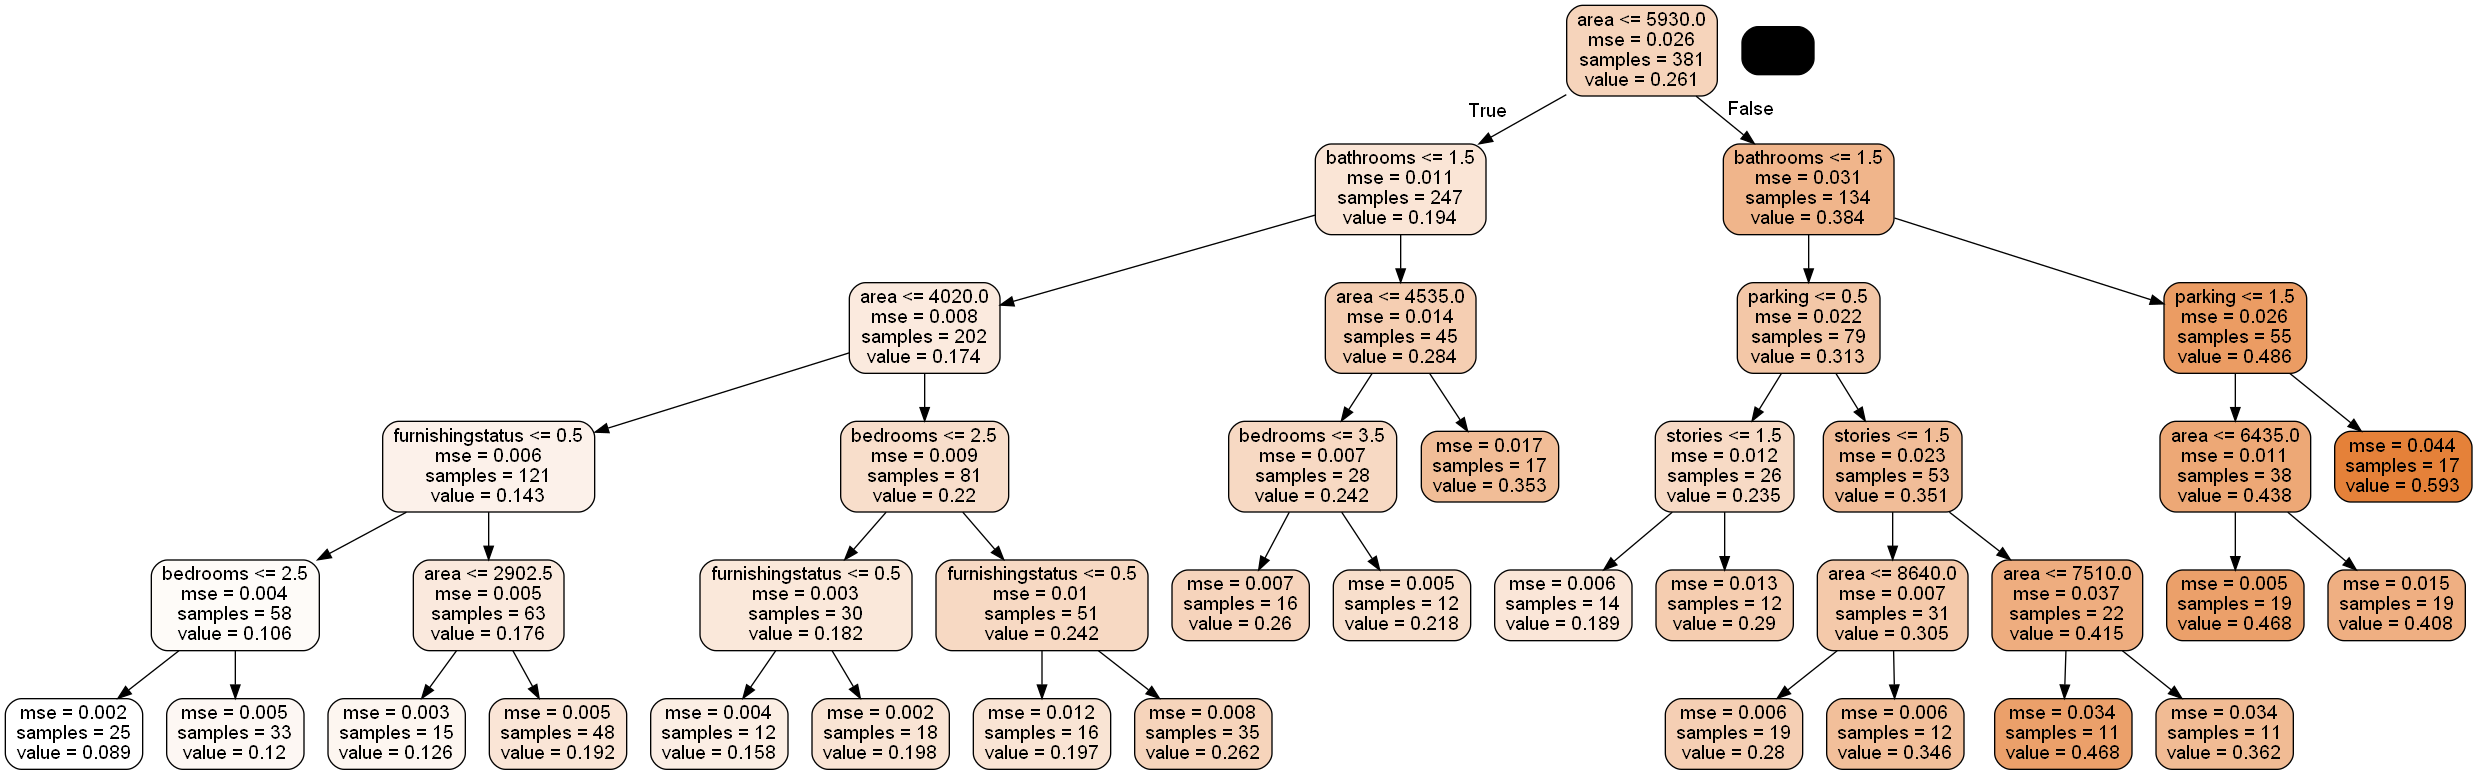

In [95]:
plot(dt_best)

In [100]:
y_train_pred = dt_best.predict(x_train)
y_test_pred = dt_best.predict(x_test)

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_train, y_train_pred)

0.010146784940283031

In [104]:
mean_squared_error(y_test, y_test_pred)

0.012572876082632873

In [105]:
mean_absolute_error(y_train, y_train_pred)

0.07349353720917211

In [106]:
scaler.data_max_

array([13300000.])

In [107]:
scaler.data_min_

array([1750000.])